In [1]:
%config IPCompleter.greedy=True

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [4]:
features = pd.read_csv('Dummy_Covid_Locality_Data.csv')
features.head()

,Locality,Positive_Adj_Locality,People_travelling_through_infected_area,Aged_more_than_40,People_With_Symptom,Population,Infected
0,A100,0,yes,80,no,3000,no
1,B100,100,yes,100,yes,5000,yes
2,C100,10,no,30,yes,6000,no
3,D100,200,yes,60,no,4000,yes
4,E100,5,no,50,no,2000,no


# Drop column pdays from dataframe

In [5]:
features = features.drop(['Locality'], axis=1)
features.head()

,Positive_Adj_Locality,People_travelling_through_infected_area,Aged_more_than_40,People_With_Symptom,Population,Infected
0,0,yes,80,no,3000,no
1,100,yes,100,yes,5000,yes
2,10,no,30,yes,6000,no
3,200,yes,60,no,4000,yes
4,5,no,50,no,2000,no


In [7]:
x = features.iloc[:, :-1].values
y = features.iloc[:, -1].values

In [8]:
print(x)
print(y)

[[0 'yes' 80 'no' 3000]
 [100 'yes' 100 'yes' 5000]
 [10 'no' 30 'yes' 6000]
 [200 'yes' 60 'no' 4000]
 [5 'no' 50 'no' 2000]
 [0 'yes' 86 'yes' 7000]
 [500 'yes' 70 'yes' 6987]
 [30 'no' 100 'no' 3467]
 [487 'yes' 240 'yes' 5698]
 [20 'no' 120 'no' 2345]
 [0 'no' 40 'yes' 560]
 [987 'yes' 23 'yes' 2345]
 [345 'yes' 46 'no' 987]
 [878 'no' 31 'no' 6897]
 [0 'no' 150 'yes' 4567]
 [0 'no' 84 'no' 340]
 [345 'yes' 56 'yes' 3678]
 [30 'yes' 76 'no' 936]
 [400 'no' 87 'yes' 5634]
 [10 'yes' 90 'yes' 4387]
 [0 'no' 45 'no' 4136]
 [90 'yes' 69 'yes' 378]
 [600 'yes' 21 'no' 4895]
 [432 'yes' 80 'yes' 7563]
 [56 'no' 35 'no' 234]
 [78 'no' 59 'no' 956]
 [300 'yes' 320 'no' 4587]
 [456 'yes' 140 'yes' 4987]
 [987 'yes' 130 'no' 5786]
 [1200 'yes' 283 'yes' 5498]
 [459 'no' 303 'no' 6543]
 [0 'yes' 25 'no' 500]
 [0 'yes' 36 'no' 1987]
 [0 'no' 54 'no' 2378]
 [567 'yes' 67 'no' 456]
 [867 'yes' 28 'no' 128]
 [0 'no' 129 'yes' 982]
 [0 'no' 435 'no' 2545]
 [0 'yes' 567 'no' 546]
 [987 'no' 254 'no

# Data pre-processing

Label encoding of y

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y[:] = le.fit_transform(y[:])
print(y)

[0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


Label encoding of marital status

In [11]:
x[:, 1] = le.fit_transform(x[:, 1])
print(x)

[[0 1 80 'no' 3000]
 [100 1 100 'yes' 5000]
 [10 0 30 'yes' 6000]
 [200 1 60 'no' 4000]
 [5 0 50 'no' 2000]
 [0 1 86 'yes' 7000]
 [500 1 70 'yes' 6987]
 [30 0 100 'no' 3467]
 [487 1 240 'yes' 5698]
 [20 0 120 'no' 2345]
 [0 0 40 'yes' 560]
 [987 1 23 'yes' 2345]
 [345 1 46 'no' 987]
 [878 0 31 'no' 6897]
 [0 0 150 'yes' 4567]
 [0 0 84 'no' 340]
 [345 1 56 'yes' 3678]
 [30 1 76 'no' 936]
 [400 0 87 'yes' 5634]
 [10 1 90 'yes' 4387]
 [0 0 45 'no' 4136]
 [90 1 69 'yes' 378]
 [600 1 21 'no' 4895]
 [432 1 80 'yes' 7563]
 [56 0 35 'no' 234]
 [78 0 59 'no' 956]
 [300 1 320 'no' 4587]
 [456 1 140 'yes' 4987]
 [987 1 130 'no' 5786]
 [1200 1 283 'yes' 5498]
 [459 0 303 'no' 6543]
 [0 1 25 'no' 500]
 [0 1 36 'no' 1987]
 [0 0 54 'no' 2378]
 [567 1 67 'no' 456]
 [867 1 28 'no' 128]
 [0 0 129 'yes' 982]
 [0 0 435 'no' 2545]
 [0 1 567 'no' 546]
 [987 0 254 'no' 762]
 [0 0 134 'yes' 4598]
 [0 0 50 'yes' 210]
 [0 1 25 'yes' 865]
 [0 1 58 'no' 3298]
 [458 0 87 'no' 3897]
 [984 1 431 'yes' 1458]
 [0 0 36

Label encoding of education

In [12]:
x[:, 3] = le.fit_transform(x[:, 3])
print(x)

[[0 1 80 0 3000]
 [100 1 100 1 5000]
 [10 0 30 1 6000]
 [200 1 60 0 4000]
 [5 0 50 0 2000]
 [0 1 86 1 7000]
 [500 1 70 1 6987]
 [30 0 100 0 3467]
 [487 1 240 1 5698]
 [20 0 120 0 2345]
 [0 0 40 1 560]
 [987 1 23 1 2345]
 [345 1 46 0 987]
 [878 0 31 0 6897]
 [0 0 150 1 4567]
 [0 0 84 0 340]
 [345 1 56 1 3678]
 [30 1 76 0 936]
 [400 0 87 1 5634]
 [10 1 90 1 4387]
 [0 0 45 0 4136]
 [90 1 69 1 378]
 [600 1 21 0 4895]
 [432 1 80 1 7563]
 [56 0 35 0 234]
 [78 0 59 0 956]
 [300 1 320 0 4587]
 [456 1 140 1 4987]
 [987 1 130 0 5786]
 [1200 1 283 1 5498]
 [459 0 303 0 6543]
 [0 1 25 0 500]
 [0 1 36 0 1987]
 [0 0 54 0 2378]
 [567 1 67 0 456]
 [867 1 28 0 128]
 [0 0 129 1 982]
 [0 0 435 0 2545]
 [0 1 567 0 546]
 [987 0 254 0 762]
 [0 0 134 1 4598]
 [0 0 50 1 210]
 [0 1 25 1 865]
 [0 1 58 0 3298]
 [458 0 87 0 3897]
 [984 1 431 1 1458]
 [0 0 365 0 964]
 [0 1 65 0 328]
 [0 1 72 0 5687]
 [0 1 235 0 2167]
 [345 0 94 0 430]
 [265 0 29 0 764]
 [345 1 46 0 987]
 [878 0 31 0 6897]
 [0 0 150 1 4567]
 [0 0 8

Label encoding of other loan status

Label encoding of contact

Label encoding of housing loan status

Label encoding of credit default

Label encoding of poutcome

# One hot encoding of feature data

Job Type

Month

# Split into train and test set

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [14]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[987 1 130 0 5786]
 [0 0 150 1 4567]
 [5 0 50 0 2000]
 [0 0 40 1 560]
 [867 1 28 0 128]
 [345 1 46 0 987]
 [0 0 365 0 964]
 [459 0 303 0 6543]
 [30 0 100 0 3467]
 [0 0 150 1 4567]
 [456 1 140 1 4987]
 [432 1 80 1 7563]
 [0 0 84 0 340]
 [0 0 50 1 210]
 [0 1 25 1 865]
 [400 0 87 1 5634]
 [400 0 87 1 5634]
 [0 0 45 0 4136]
 [0 1 36 0 1987]
 [0 0 84 0 340]
 [0 1 86 1 7000]
 [345 1 56 1 3678]
 [0 0 45 0 4136]
 [345 1 56 1 3678]
 [487 1 240 1 5698]
 [878 0 31 0 6897]
 [78 0 59 0 956]
 [0 0 435 0 2545]
 [30 1 76 0 936]
 [0 1 72 0 5687]
 [265 0 29 0 764]
 [30 1 76 0 936]
 [0 1 567 0 546]
 [100 1 100 1 5000]
 [345 1 46 0 987]
 [0 1 235 0 2167]
 [56 0 35 0 234]
 [500 1 70 1 6987]
 [432 1 80 1 7563]
 [0 0 129 1 982]
 [345 0 94 0 430]
 [90 1 69 1 378]
 [10 1 90 1 4387]
 [20 0 120 0 2345]
 [987 0 254 0 762]
 [10 1 90 1 4387]
 [200 1 60 0 4000]
 [0 1 80 0 3000]
 [878 0 31 0 6897]
 [0 1 65 0 328]
 [458 0 87 0 3897]]
[[984 1 431 1 1458]
 [1200 1 283 1 5498]
 [0 1 58 0 3298]
 [90 1 69 1 378]
 [567 1 6

# Feature scaling of train and test set

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
print(x_train)
print(x_test)

[[ 2.63928211  0.98058068  0.18222329 -0.80321933  1.11261651]
 [-0.76137685 -1.0198039   0.37053915  1.24498996  0.60263549]
 [-0.7441496  -1.0198039  -0.57104016 -0.80321933 -0.47129501]
 [-0.76137685 -1.0198039  -0.66519809  1.24498996 -1.07373363]
 [ 2.22582813  0.98058068 -0.77818761 -0.80321933 -1.25446521]
 [ 0.42730333  0.98058068 -0.60870333 -0.80321933 -0.89509385]
 [-0.76137685 -1.0198039   2.39493467 -0.80321933 -0.90471613]
 [ 0.82008461 -1.0198039   1.8111555  -0.80321933  1.42931515]
 [-0.65801335 -1.0198039  -0.1002505  -0.80321933  0.14243933]
 [-0.76137685 -1.0198039   0.37053915  1.24498996  0.60263549]
 [ 0.80974826  0.98058068  0.27638122  1.24498996  0.77834675]
 [ 0.72705747  0.98058068 -0.28856637  1.24498996  1.8560425 ]
 [-0.76137685 -1.0198039  -0.25090319 -0.80321933 -1.16577286]
 [-0.76137685 -1.0198039  -0.57104016  1.24498996 -1.22015968]
 [-0.76137685  0.98058068 -0.80643499  1.24498996 -0.94613378]
 [ 0.61680307 -1.0198039  -0.22265581  1.24498996  1.04

# Building ANN

Define ANN

In [17]:
ann = tf.keras.models.Sequential()

Add Input/1st Hidden layer

In [18]:
ann.add(tf.keras.layers.Dense(units=30, activation='relu'))

Add 2nd Hidden layer

In [19]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

Add output layer

In [20]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Compile ANN using Schocastic Gradiant optimizer (adam)

In [21]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


# Fit/Train ANN

In [22]:
ann.fit(x_train, y_train, batch_size=32, epochs=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
51/51 [==============================] - 1s 24ms/sample - loss: 0.8495 - acc: 0.2353
Epoch 2/100
51/51 [==============================] - 0s 181us/sample - loss: 0.8335 - acc: 0.2353
Epoch 3/100
51/51 [==============================] - 0s 232us/sample - loss: 0.8177 - acc: 0.2353
Epoch 4/100
51/51 [==============================] - 0s 0s/sample - loss: 0.8064 - acc: 0.2353
Epoch 5/100
51/51 [==============================] - 0s 121us/sample - loss: 0.7945 - acc: 0.2353
Epoch 6/100
51/51 [==============================] - 0s 186us/sample - loss: 0.7829 - acc: 0.2353
Epoch 7/100
51/51 [==============================] - 0s 186us/sample - loss: 0.7721 - acc: 0.2353
Epoch 8/100
51/51 [==============================] - 0s 144us/sample - loss: 0.7618 - acc: 0.2353
Epoch 9/100
51/51 [==============================] - 0s 100us/sample - loss: 0.7525 - acc: 0.2353
Epoch 10/100
51/51 [==============================] - 0s 197us/sample - lo

51/51 [==============================] - 0s 110us/sample - loss: 0.6371 - acc: 0.8627
Epoch 81/100
51/51 [==============================] - 0s 107us/sample - loss: 0.6365 - acc: 0.8627
Epoch 82/100
51/51 [==============================] - 0s 175us/sample - loss: 0.6358 - acc: 0.8627
Epoch 83/100
51/51 [==============================] - 0s 87us/sample - loss: 0.6351 - acc: 0.8824
Epoch 84/100
51/51 [==============================] - 0s 171us/sample - loss: 0.6345 - acc: 0.8824
Epoch 85/100
51/51 [==============================] - 0s 69us/sample - loss: 0.6339 - acc: 0.8824
Epoch 86/100
51/51 [==============================] - 0s 130us/sample - loss: 0.6331 - acc: 0.8627
Epoch 87/100
51/51 [==============================] - 0s 100us/sample - loss: 0.6325 - acc: 0.8627
Epoch 88/100
51/51 [==============================] - 0s 78us/sample - loss: 0.6318 - acc: 0.8627
Epoch 89/100
51/51 [==============================] - 0s 215us/sample - loss: 0.6312 - acc: 0.8627
Epoch 90/100
51/51 [======

# Predict using ANN and test set

In [23]:
y_pred = ann.predict(x_test)
y_pred = y_pred > 0.5

In [24]:
print(y_pred)

[[ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [False]
 [ True]]


In [25]:
y_test = y_test == 1
print(y_test)

[False  True False False False False False False False False  True False
  True]


In [26]:
print(len(y_test))
print(len(y_pred))
print(len(x_train))
print(len(y_train))

13
13
51
51


In [27]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ True False]
 [ True  True]
 [False False]
 [False False]
 [ True False]
 [False False]
 [False False]
 [False False]
 [False False]
 [ True False]
 [ True  True]
 [False False]
 [ True  True]]


# Get confusion matrix and accuracy score

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score

result = confusion_matrix(y_test, y_pred)
print(result)
accuracy_score(y_test, y_pred)

[[7 3]
 [0 3]]


0.7692307692307693

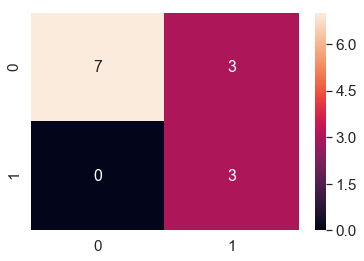

In [30]:
import seaborn as sn
import matplotlib.pyplot as plt

%matplotlib inline

sn.set(font_scale=1.4) # for label size
sn.heatmap(result, annot=True, annot_kws={"size": 16}) # font size

plt.show()